# Here we start Task 2  TFIDF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pickle
import openpyxl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme()
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import label_binarize
from sklearn import svm

# Dataset loading and adjusting

In [3]:
tm_dataframe = pd.read_excel('data/final_tm_df.xlsx')
# del final_df['LDA_12']
# del final_df['Author']


In [4]:
from gensim.models import TfidfModel

bow = pickle.load(open("models/corpus_bow_filtered.p", "rb"))
tfidf = TfidfModel(bow)


In [5]:
lista = tfidf[bow] 

dict_2_list = []
for i in range(0,len(lista)):
    item_dict = {item[0]: item[1] for item in lista[i]}
    dict_2_list.append(item_dict)

    
data = pd.DataFrame(dict_2_list) #We create the new dataframe with the new dictionary
data.fillna(0,inplace=True) #We fill the nans with 0 as the vectors were sparse

data["Mayor Parties"] = tm_dataframe["Mayor Parties"]
data

,0,1,2,3,4,5,6,7,8,9,...,8137,8138,8139,8140,8141,8142,8143,8144,8145,Mayor Parties
0,0.334727,0.2409,0.292522,0.272898,0.170969,0.345256,0.242608,0.31915,0.308098,0.242608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PSOE
1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PSOE
2,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PSOE
3,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PSOE
4,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PSOE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12159,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PP
12160,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PP
12161,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PP
12162,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PP


### Sets split

In [6]:
#we separate our data into training and test
df_test, df_train = train_test_split(data, test_size=0.7, random_state=420)

df_test, df_val = train_test_split(df_test, test_size=0.5, random_state=420)

Y_train = df_train['Mayor Parties']
X_train = df_train.iloc[:,2:-2]

Y_test = df_test['Mayor Parties']
X_test = df_test.iloc[:,2:-2]

Y_val = df_val['Mayor Parties']
X_val = df_val.iloc[:,2:-2]

print(f"Len train: {len(X_train)}")
print(f"Len test: {len(X_test)}")
print(f"Len validation: {len(X_val)}")

Len train: 8515
Len test: 1824
Len validation: 1825


### Scaling the data

In [7]:
#we will first scale our data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Data dimensionality reduction

### Visualizing our data to identify features and clusters

#### Principal Component Analysis visualization

In [ ]:
# we check how some dimensionality reduction techniques work
# pca = PCA(n_components=X_train.shape[1]).fit(X_train)
# eigenvalues = pca.explained_variance_


# data_variance = np.sum(np.var(X_train,0))

# plt.figure()
# plt.plot(100*np.cumsum(eigenvalues)/data_variance, 'o-', label='Evolution eigenvalues')
# plt.xlabel('$K$: Number of principal components')
# plt.ylabel('Percentage of the variance')
# plt.show()


In [ ]:
# p_train = pca.transform(X_train)
# sns.scatterplot(x = p_train[:,0], y = p_train[:,1] , hue = Y_train)
# plt.show()

#### T-Distributed Stochastic Neighbor Embedding visualization

In [ ]:
# from sklearn.manifold import TSNE
# p_train = TSNE(n_components=2).fit_transform(X_train)

# sns.scatterplot(x = p_train[:,0], y = p_train[:,1] , hue = Y_train)
# plt.show()

### As we have seen here, PCA is not working very good, mainly because the matrix is too sparse, so we will perform LSI to get a better understanding of the most important features

In [8]:
Dtra, Stra, Ttra = np.linalg.svd(X_train)

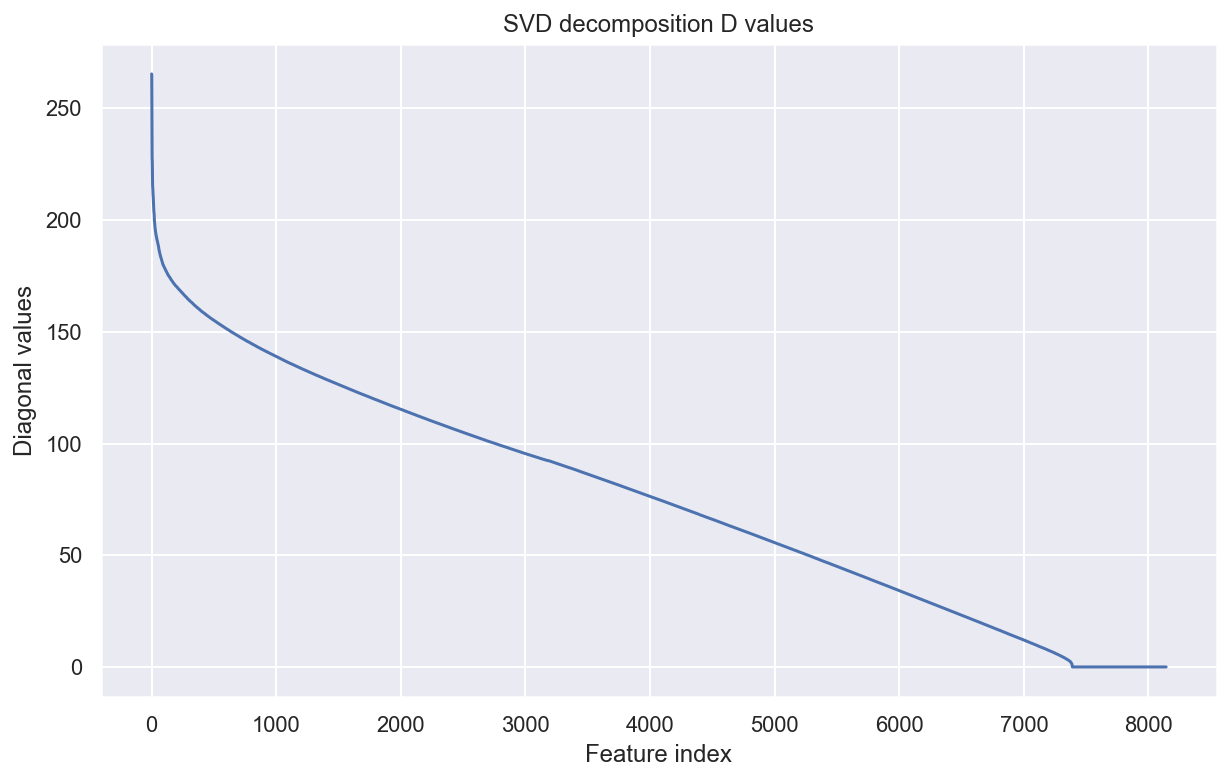

In [9]:
plt.figure()
plt.title('SVD decomposition D values')
plt.xlabel('Feature index')
plt.ylabel('Diagonal values')
plt.plot(Stra)
plt.show()


### As we can clearly see the first few values of the diagonal are larger, so we are going to keep the first 140 features from D, which means that we are going to keep the first 140 from the original dataset and apply KNN on it

In [10]:
P_train = Dtra[:,:140]

Dtst, Stst, Ttst = np.linalg.svd(X_test)
P_test = Dtst[:,:140]

Dval, Sval, Tval = np.linalg.svd(X_test)
P_val = Dval[:,:140]

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 15)
# Fit the classifier to the data
knn.fit(P_train, Y_train)

#check accuracy of our model on the test data
knn.score(P_test, Y_test)

0.24067982456140352

In [13]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=60)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, P_train, Y_train, cv=100)


In [15]:
cv_scores
print(sorted(cv_scores))
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.29411764705882354, 0.32558139534883723, 0.32941176470588235, 0.32941176470588235, 0.3411764705882353, 0.3411764705882353, 0.3411764705882353, 0.3488372093023256, 0.35294117647058826, 0.35294117647058826, 0.35294117647058826, 0.36470588235294116, 0.36470588235294116, 0.36470588235294116, 0.36470588235294116, 0.36470588235294116, 0.37209302325581395, 0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 0.38823529411764707, 0.38823529411764707, 0.38823529411764707, 0.38823529411764707, 0.38823529411764707, 0.38823529411764707, 0.38823529411764707, 0.3953488372093023, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4069767441860465, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4117647058823529, 0.4186046511627907, 0.4186046511627907, 0.4186046511627907, 0.4235294117647059, 0.4235294117647059, 0.4235294117647059, 0.4235294117647059, 0.4235294117647059, 0.42

In [16]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(5, 60,10),
             'weights': ['uniform', 'distance']}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)

#fit model to data
knn_gscv.fit(P_train, Y_train)



GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5, 15, 25, 35, 45, 55]),
                         'weights': ['uniform', 'distance']})

In [17]:
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)

{'n_neighbors': 15, 'weights': 'distance'}
0.4333475392109807
